In [8]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import itertools

In [11]:
os.chdir("/.../Chapter 7")
os.getcwd()

'/Users/Dippies/CODE PACKT - EML/Chapter 7'

In [12]:
# Read the Dataset
df_breastcancer = pd.read_csv("breastcancer.csv")

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis']) 
df_breastcancer.head(5)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
#create feature & response variables

# drop the response var and id column as it'll not make any sense to the analysis
X = df_breastcancer.iloc[:,2:31]  

#Target
Y = df_breastcancer.iloc[:,0] 

# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify= Y)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 29)
(114, 29)
(455,)
(114,)


In [46]:
GBM_model = GradientBoostingClassifier() 
GBM_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

             precision    recall  f1-score   support

          0       0.97      0.96      0.97        72
          1       0.93      0.95      0.94        42

avg / total       0.96      0.96      0.96       114

Confusion matrix
[[69  3]
 [ 2 40]]


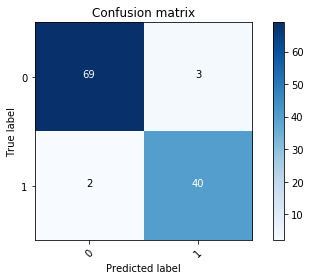

In [78]:
Y_pred_gbm = GBM_model.predict(X_test)

print(classification_report(Y_test, Y_pred_gbm))


conf_matrix = confusion_matrix(Y_test, Y_pred_gbm)
plot_confusion_matrix(conf_matrix, classes=[0,1])

** You can also visualize the classification report with yellowbrick **

In [81]:
print("Accuracy score = {:0.2f}".format(accuracy_score(Y_test, Y_pred_gbm)))
print("Area under ROC curve = {:0.2f}".format(roc_auc_score(Y_test, Y_pred_gbm)))

Accuracy score = 0.96
Area under ROC curve = 0.96


** Hyper-parameter tuning **

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[100,150,200],
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "min_samples_split":np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.3, 0.6, 1.0]
    }

In [75]:
grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1) 
grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'loss': ['deviance'], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'min_samples_split': array([ 0.1    ,  0.23333,  0.36667,  0.5    ]), 'min_samples_leaf': array([ 0.1    ,  0.23333,  0.36667,  0.5    ]), 'max_depth': [3, 5, 8], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse', 'mae'], 'subsample': [0.3, 0.6, 1.0]},
       

In [70]:
grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.6, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.10000000000000001,
              min_samples_split=0.10000000000000001,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.6, verbose=0,
              warm_start=False)

In [71]:
grid_predictions = grid.predict(X_test)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97        72
          1       0.93      0.98      0.95        42

avg / total       0.97      0.96      0.97       114

Confusion matrix
[[69  3]
 [ 1 41]]


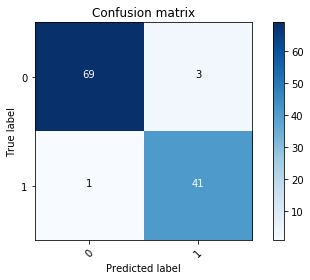

In [72]:
print(classification_report(Y_test, grid_predictions))

cnf_matrix = confusion_matrix(Y_test, grid_predictions)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [82]:
print("Accuracy score = {:0.2f}".format(accuracy_score(Y_test, grid_predictions)))
print("Area under ROC curve = {:0.2f}".format(roc_auc_score(Y_test, grid_predictions)))

Accuracy score = 0.96
Area under ROC curve = 0.97
